#Α. Στοιχεία ομάδας

##1.

**Ομάδα Α9**

Μαύρος Γεώργιος,    03112618

Κρίσιλιας Ανδρέας,   03114778

# Β. Εισαγωγή του dataset


##1.

Το dataset έχει να κάνει με την πρόβλεψη χρεοκοπίας Πολωνικών εταιριών. Περιέχει 64 οικονομικούς βαθμούς (attributes), 1 id και 1 πεδίο class για κάθε εταιρία - δείγμα. 

Τα attributes κάθε δείγματος έχουν καταγραφεί για 1 από τα 5 συνεχόμενα έτη κατά τα οποία έλαβε χώρα η συνολική καταγραφή.

Η στήλη class υποδεικνύει την κατάσταση της κάθε εταιρίας στο έκτο έτος. Και λαμβάνει τιμές: 0/μη χρεωκοπημένη, 1/χρεωκοπημένη.



##2.


Ανεβάζουμε το data.csv αρχείο που περιέχει τα δείγματα.

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name = fn, length = len(uploaded[fn])))

Saving data.csv to data.csv
User uploaded file "data.csv" with length 21310409 bytes


Ενημέρωση βιβλιοθηκών

In [0]:
!pip uninstall -y scikit-learn
!pip uninstall -y numpy
!pip uninstall -y pandas

!pip install scikit-learn
!pip install numpy
!pip install pandas

import warnings 
warnings.filterwarnings('ignore')

!pip uninstall -y imbalanced-learn
!pip install imbalanced-learn

Uninstalling scikit-learn-0.20.1:
  Successfully uninstalled scikit-learn-0.20.1
Uninstalling numpy-1.14.6:
  Successfully uninstalled numpy-1.14.6
Uninstalling pandas-0.22.0:
  Successfully uninstalled pandas-0.22.0
    100% |████████████████████████████████| 5.4MB 7.5MB/s 
    100% |████████████████████████████████| 13.9MB 2.4MB/s 
xarray 0.11.0 requires pandas>=0.19.2, which is not installed.
stable-baselines 2.2.1 requires pandas, which is not installed.
pymc3 3.5 requires pandas>=0.18.0, which is not installed.
mlxtend 0.14.0 requires pandas>=0.17.1, which is not installed.
magenta 0.3.19 requires pandas>=0.18.1, which is not installed.
fix-yahoo-finance 0.0.22 requires pandas, which is not installed.
featuretools 0.4.1 requires pandas>=0.23.0, which is not installed.
fbprophet 0.3.post2 requires pandas>=0.20.1, which is not installed.
cufflinks 0.14.6 requires pandas>=0.19.2, which is not installed.
altair 2.3.0 requires pandas, which is not installed.
thinc 6.12.1 has requiremen

Ελέγχουμε ότι το αρχείο που ανεβάσαμε υπάρχει στο file system.

In [0]:
!ls

data.csv  sample_data


Διαβάζουμε το αρχείο (αντικαθιστώντας ταυτόχρονα τις τιμές '?' με NaN) και τυπώνουμε τις 5 πρώτες γραμμές.

In [0]:
import pandas as pd
from io import StringIO

df = pd.read_csv("data.csv", na_values=["?"], header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


Αποθήκευση των attributes και της κλάσης σε διαφορετικά dataframes και μετατροπή αυτών σε numpy arrays.

In [0]:
# dataframes
labels_df = df.iloc[:,-1]
features_df = df.iloc[:,0:-1]

# μετατροπή σε numpy arrays
np_labels = labels_df.values.flatten()
np_features = features_df.values


Αριθμός δειγμάτων

In [0]:
# αριθμός δειγμάτων
np_labels.size

43405

Αριθμός χαρακτηριστικών

In [0]:
# αριθμός χαρακτηριστικών
np_features.shape[1]

64

Είδος χαρακτηριστικών

In [0]:
# type features of first sample
features_df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60    float64
61    float64
62    float64
63    float64
Length: 64, dtype: object

Παρατηρούμε λοιπόν ότι όλα τα χαρακτηριστικά είναι τύπου float.

Δε φαίνονται βέβαια τα Αttr30 έως Attr33 οπότε τα τυπώνουμε κι αυτά από κάτω

In [0]:
for i in range (30,34):
  print(str(i) + " ", end = '')
  print(type(np_features[0,i]))

30 <class 'numpy.float64'>
31 <class 'numpy.float64'>
32 <class 'numpy.float64'>
33 <class 'numpy.float64'>


Δεν έχουμε ούτε χαρακτηριστικά τύπου string, ούτε τύπου int (τα οποία θα μπορούσαν να υποδηλώνουν κάποια αντιστοιχία με κατηγορία). Επομένως συμπεραίνουμε ότι όλα τα χαρακτηριστικά μας είναι διατεταγμένα (τύπου float όλα).

##3.


Υπάρχει αρίθμηση γραμμών αλλά όχι επικεφαλίδες, όπως φαίνεται και από την τύπωση του dataframe παρακάτω.

In [0]:
# 
print(df)

             0         1         2         3             4         5   \
0      0.200550  0.379510  0.396410   2.04720  3.235100e+01  0.388250   
1      0.209120  0.499880  0.472250   1.94470  1.478600e+01  0.000000   
2      0.248660  0.695920  0.267130   1.55480 -1.152300e+00  0.000000   
3      0.081483  0.307340  0.458790   2.49280  5.195200e+01  0.149880   
4      0.187320  0.613230  0.229600   1.40630 -7.312800e+00  0.187320   
5      0.228220  0.497940  0.359690   1.75020 -4.771700e+01  0.000000   
6      0.111090  0.647440  0.289710   1.47050  2.534900e+00  0.000000   
7      0.532320  0.027059  0.705540  53.95400  2.995800e+02  0.000000   
8      0.009020  0.632020  0.053735   1.12630 -3.784200e+01  0.000000   
9      0.124080  0.838370  0.142040   1.16940 -9.188300e+01  0.000000   
10     0.240010  0.443550  0.188350   1.44000 -2.116500e+01 -0.931900   
11    -0.027117  0.111480  0.119890   2.07540 -3.164300e+01 -0.084883   
12     0.266690  0.349940  0.611470   3.02430  4.30

##4.

Οι ετικέτες των κλάσεων παίρνουν τιμές 0 (για μη χρεωκοπία) και 1 (για χρεωκοπία). Βρίσκονται στην τελευταία (66η) κολόνα του dataframe, και είναι οι εξής:

In [0]:
# τύπωση ετικετών
print(labels_df)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
43375    1
43376    1
43377    1
43378    1
43379    1
43380    1
43381    1
43382    1
43383    1
43384    1
43385    1
43386    1
43387    1
43388    1
43389    1
43390    1
43391    1
43392    1
43393    1
43394    1
43395    1
43396    1
43397    1
43398    1
43399    1
43400    1
43401    1
43402    1
43403    1
43404    1
Name: 64, Length: 43405, dtype: int64


##5.
To dataset αποτελείται από 5 αρχεία .arff (1year.arff, 2year.arff, 3year.arff, 4year.arff, 5year.arff) τα οποία μετατρέπουμε σε .csv μέσω του bash:

cat 1year.arff | grep -ve "^@\|^%" | grep -v "^[[:space:]]*$" > data1.csv

cat 2year.arff | grep -ve "^@\|^%" | grep -v "^[[:space:]]*$" > data2.csv

cat 3year.arff | grep -ve "^@\|^%" | grep -v "^[[:space:]]*$" > data3.csv

cat 4year.arff | grep -ve "^@\|^%" | grep -v "^[[:space:]]*$" > data4.csv

cat 5year.arff | grep -ve "^@\|^%" | grep -v "^[[:space:]]*$" > data5.csv
<br><br>
Και τα κάνουμε concatenate πάλι μέσω του bash:

cat \*.csv > data.csv
<br><br>
Και παίρνουμε έτσι το τελικό αρχείο: *data.csv*, στο οποίο αντικαθιστούμε κατά την ανάγνωση τους χαρακτήρες '?' με NaN. Αυτό το κάνουμε δίνοντας στη συνάρτηση read_csv ως παράμετρο na_values=["?"].


##6.

Εύρεση δειγμάτων με απουσιάζουσες τιμές.

In [0]:
missing = sum([True for idx,row in df.iterrows() if any(row.isnull())])
missing

23438

Επομένως υπάρχουν απουσιάζουσες τιμές. 

Τα δείγματα με τουλάχιστον μία απουσιάζουσα τιμή είναι 23438 όπως φαίνεται και παραπάνω.

Ποσοστό δειγμάτων με απουσιάζουσες τιμές

In [0]:
# missing values samples percentage
print(missing / np_labels.size * 100, end = '')
print(" %")

53.99838728257114 %


##7.

Υπάρουν 2 κλάσεις: 0 για μη χρεωκοπημένες εταιρίες και 1 για χρεωκοπημένες.

In [0]:
import numpy as np

# διαφορετικές κλάσεις
print("Διαφορετικές κλάσεις: ", np.unique(np_labels))

# αριθμός κλάσεων
print("Αριθμός κλάσεων: ", np.unique(np_labels).size)

Διαφορετικές κλάσεις:  [0 1]
Αριθμός κλάσεων:  2


Τα ποσοστά των δειγμάτων τους επί του συνόλου φαίνεται παρακάτω:

In [0]:
print("Ποσοστά δειγμάτων κλάσεων (%): ", np.bincount(np_labels)/np_labels.size*100)

Ποσοστά δειγμάτων κλάσεων (%):  [95.18258265  4.81741735]


Όπως εύκολα διακρίνουμε, το dataset μας δεν είναι καθόλου ισορροπημένο καθότι τα δείγματα της κλάσης 0 είναι πάνω από 19 φορές περισσότερα αυτών της κλάσης 1:


In [0]:
# αναλογία δειγμάτων
freq = np.bincount(np_labels)
print("Αναλογία δειγμάτων: ", freq[0]/freq[1])

Αναλογία δειγμάτων:  19.758010521281683


##8.

Όπως είδαμε παραπάνω το ποσοστό των δειγμάτων με απουσιάζουσες τιμές είναι σχεδόν 54%. Επομένως δεν υπάρχει περίπτωση να θυσιάσουμε τόσο πολλά δείγματα. Θα κάνουμε χρήση του μετασχηματιστή Imputer,  ώστε να αντικαταστήσουμε κάθε απουσιάζουσα τιμή με τη μέση τιμή του χαρακτηριστικού στο train set.

Χωρίζουμε, λοιπόν, αρχικά το dataset σε train και test set σε αναλογία 70-30.

In [0]:
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(np_features, np_labels, test_size = 0.3)

Και στη συνέχεια εφαρμόζουμε τον Imputer στο train set.

In [0]:
from sklearn.preprocessing import Imputer

imp = Imputer(strategy = 'mean', axis = 0)
imp = imp.fit(X_train)
X_train = imp.transform(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Και τον εφαρμόζουμε επίσης και στο test set.

In [0]:
X_test = imp.transform(X_test)

#Γ. Baseline classification

##1.

Εκπαίδευση των ταξινομητών στο train set με απλή αρχικοποίηση (default τιμές).

In [0]:
# Baseline classification

# Initialization and training

# α) dummy classifiers
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

dc_uniform.fit(X_train, y_train)
dc_constant_0.fit(X_train, y_train)
dc_constant_1.fit(X_train, y_train)
dc_most_frequent.fit(X_train, y_train)
dc_stratified.fit(X_train, y_train)

# β) Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

# γ) kNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() # default n_neighbors=5

knn.fit(X_train, y_train)

# δ) Multi-Layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Κάνουμε εκτίμηση στο test set για τους παραπάνω ταξινομητές.

In [0]:
# Prediction

# α) dummy classifiers
dc_uni_pred = dc_uniform.predict(X_test)
dc_co0_pred = dc_constant_0.predict(X_test)
dc_co1_pred = dc_constant_1.predict(X_test)
dc_mos_pred = dc_most_frequent.predict(X_test)
dc_str_pred = dc_stratified.predict(X_test)

# β) Gaussian Naive Bayes
gnb_pred = gnb.predict(X_test)

# γ) kNN
knn_pred = knn.predict(X_test)

# δ) Multi-Layer Perceptron (MLP)
mlp_pred = mlp.predict(X_test)

# Estimation
from sklearn.metrics import accuracy_score

accuracy = {}

# α) dummy classifiers
accuracy['uniform'] = accuracy_score(y_test, dc_uni_pred)
accuracy['constant 0'] = accuracy_score(y_test, dc_co0_pred)
accuracy['constant 1'] = accuracy_score(y_test, dc_co1_pred)
accuracy['most frequent'] = accuracy_score(y_test, dc_mos_pred)
accuracy['stratified'] = accuracy_score(y_test, dc_str_pred)

# β) Gaussian Naive Bayes
accuracy['gaussian naive bayes'] = accuracy_score(y_test, gnb_pred)

# γ) kNN
accuracy['kNN'] = accuracy_score(y_test, knn_pred)

# δ) Multi-Layer Perceptron (MLP)
accuracy['mlp'] = accuracy_score(y_test, mlp_pred)

# results
print("Baseline classification accurary\n")
sorted_accuracy = [(k, accuracy[k]) for k in sorted(accuracy, key=accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k, v)

Baseline classification accurary

constant 0 0.9518507141760099
most frequent 0.9518507141760099
kNN 0.9506220242666257
stratified 0.9087697742282291
mlp 0.8703732145599754
uniform 0.4992320688066349
gaussian naive bayes 0.07049608355091384
constant 1 0.04814928582399017


Παρατηρούμε ότι λόγω της μεγάλης ανισορροπίας του dataset κάποιοι dummy classifiers πέτυχαν την καλύτερη πιστότητα, ενώ αντιθέτως ο Gaussian Naive Bayes είχε πιστότητα κάτω από 7,1%.

Τυπώνουμε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.

In [0]:
# ορίζουμε αρχικά τα ονόματα των κλάσεων
label_names = ['Μη Χρεωκοπημένη', 'Χρεωκοπημένη' ]

# confusion matrix, f1-micro average, f1-macro average
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

metrics_names = ['precision', 'recall', 'f1-score', 'support']

# συνάρτηση για εκτύπωση confusion matrix, f1-micro average. f1-macro average
def cm_mic_mac_function(name, pred):
  print("Για τον ", name, " έχουμε τα κάτωθι:\n")
  cm = confusion_matrix(y_test, pred)
  print("Confusion Matrix")
  print(label_names)
  print(cm, "\n")
  
  print("micro avg")
  print(metrics_names)
  mic = precision_recall_fscore_support(y_test, pred, average='micro')
  print(mic)
  print("f1 micro average = ", mic[2], "\n")
  print("macro avg")
  print(metrics_names)
  mac = precision_recall_fscore_support(y_test, pred, average='macro')
  print(mac)
  print("f1 macro average = ", mac[2], "\n\n\n")
  return mic, mac 

# α) dummy classifiers             
(uni_pr_mic,uni_re_mic,uni_f1_mic,_), (uni_pr_mac,uni_re_mac,uni_f1_mac,_) = cm_mic_mac_function('dc uniform', dc_uni_pred)
(co0_pr_mic,co0_re_mic,co0_f1_mic,_), (co0_pr_mac,co0_re_mac,co0_f1_mac,_) = cm_mic_mac_function('dc constant 0', dc_co0_pred)
(co1_pr_mic,co1_re_mic,co1_f1_mic,_), (co1_pr_mac,co1_re_mac,co1_f1_mac,_) = cm_mic_mac_function('dc constant 1', dc_co1_pred)
(mos_pr_mic,mos_re_mic,mos_f1_mic,_), (mos_pr_mac,mos_re_mac,mos_f1_mac,_) = cm_mic_mac_function('dc most frequent', dc_mos_pred)
(str_pr_mic,str_re_mic,str_f1_mic,_), (str_pr_mac,str_re_mac,str_f1_mac,_) = cm_mic_mac_function('dc stratified', dc_str_pred)

# β) Gaussian Naive Bayes
(gnb_pr_mic,gnb_re_mic,gnb_f1_mic,_), (gnb_pr_mac,gnb_re_mac,gnb_f1_mac,_) = cm_mic_mac_function('Gaussian Naive Bayes', gnb_pred)

# γ) kNN
(knn_pr_mic,knn_re_mic,knn_f1_mic,_), (knn_pr_mac,knn_re_mac,knn_f1_mac,_) = cm_mic_mac_function('kNN', knn_pred)

# δ) Multi-Layer Perceptron (MLP)
(mlp_pr_mic,mlp_re_mic,mlp_f1_mic,_), (mlp_pr_mac,mlp_re_mac,mlp_f1_mac,_) = cm_mic_mac_function('Multi-Layer Perceptron (MLP)', mlp_pred)




Για τον  dc uniform  έχουμε τα κάτωθι:

Confusion Matrix
['Μη Χρεωκοπημένη', 'Χρεωκοπημένη']
[[6170 6225]
 [ 296  331]] 

micro avg
['precision', 'recall', 'f1-score', 'support']
(0.4992320688066349, 0.4992320688066349, 0.4992320688066349, None)
f1 micro average =  0.4992320688066349 

macro avg
['precision', 'recall', 'f1-score', 'support']
(0.5023550936262653, 0.5128460246292139, 0.3732110813723349, None)
f1 macro average =  0.3732110813723349 



Για τον  dc constant 0  έχουμε τα κάτωθι:

Confusion Matrix
['Μη Χρεωκοπημένη', 'Χρεωκοπημένη']
[[12395     0]
 [  627     0]] 

micro avg
['precision', 'recall', 'f1-score', 'support']
(0.9518507141760099, 0.9518507141760099, 0.9518507141760099, None)
f1 micro average =  0.9518507141760099 

macro avg
['precision', 'recall', 'f1-score', 'support']
(0.47592535708800493, 0.5, 0.48766573553133735, None)
f1 macro average =  0.48766573553133735 



Για τον  dc constant 1  έχουμε τα κάτωθι:

Confusion Matrix
['Μη Χρεωκοπημένη', 'Χρεωκοπημένη']
[

##2.

Αρχικά θα ορίσουμε μία συνάρτηση μέσω της οποίας θα εμφανίζονται τα διαγράμματα.

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('Uni', 'Co0', 'Co1', 'MoF', 'Str', 'GNB', 'kNN', 'MLP')
y_pos = np.arange(len(objects))

def bar_plot_function(title, performance):
  plt.bar(y_pos, performance, align='center', alpha=0.5)
  plt.xticks(y_pos, objects)
  plt.ylabel('Value')
  plt.title(title)
  plt.show()

Για f1 micro average έχουμε το παρακάτω plot:


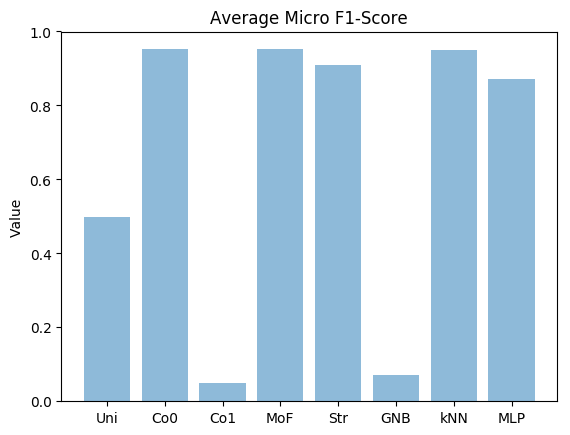

In [0]:
perf = [uni_f1_mic, co0_f1_mic, co1_f1_mic, mos_f1_mic, str_f1_mic, gnb_f1_mic, knn_f1_mic, mlp_f1_mic]
bar_plot_function('Average Micro F1-Score', perf)

Για f1 macro average έχουμε τα παρακάτω plots:

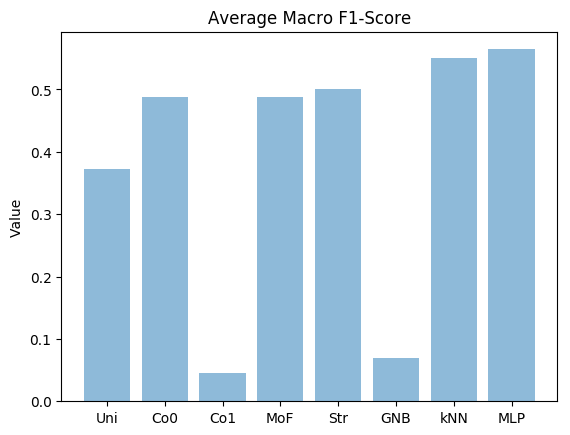

In [0]:
perf = [uni_f1_mac, co0_f1_mac, co1_f1_mac, mos_f1_mac, str_f1_mac, gnb_f1_mac, knn_f1_mac, mlp_f1_mac]
bar_plot_function('Average Macro F1-Score', perf)

##3.

Ο DC uniform βλέπουμε ότι σε όλες τις μετρικές του έχει ποσοστά γύρω στο 0.5, τόσο σε micro όσο και σε macro average, πράγμα λογικό αφού κατατάσσει σωστά για κάθε κλάση τα μισά περίπου δείγματα.<br><br>
Ο DC constant 0 προβλέπει το 95% περίπου των δειγμάτων χάρη στην τεράστια ανισορροπία του dataset. Έτσι πετυχαίνει πολύ καλές μετρικές για micro average. Στα macro average, όμως, οι μετρικές του πέφτουνε περίπου στη μέση. Αυτό συμβαίνει διότι σε αυτήν την περίπτωση βγαίνει ο μέσος όρος των μετρικών των 2 κλάσεων, και ενώ τα έχει πάει καλά για την κλάση 0, στην 1 δεν κατατάξει τίποτα και έτσι ο μέσος όρος πάει κάπου στο 0.5.<br><br>
Για αντίστοιο λόγο ο DC constant 1 δεν έχει καλές μετρικές ούτε σε micro ούτε σε macro average.<br><br>
Ο DC most frequent μαντεύει πάντα 0, οπότε έχει ακριβώς ίδες μετρικές με τον constant 0.<br><br>
Ο DC stratified λόγω του ότι προσπαθεί να μαντέψει και δείγματα της κλάσης 1 με ένα μικρό ποσοστό (αντίστοιχο της ισορροπίας των κλάσεων) έχει χειρότερες μετρικές σε micro average, αλλά καλύτερες εν τέλει σε macro.<br><br>
O Gaussian Naive Bayes βλέπουμε ότι πετυχένει εν γένει πολύ χαμηλή απόδοση. Πιθανώς για αυτό να ευθύνεται η μεγάλη ανισορροπία του dataset και η έλλειψη κανονικοποίησης.<br><br>
Οι kNN και MLP βλέπουμε ότι έχουν γενικά καλές μετρικές τόσο σε micro average, όπου βρίσκονται κοντά στον most frequent, παρά τη μεγάλη ανισορροπία, όσο και σε macro average, όπου ξεπερνάνε την απόδοση των dummies.

#Δ. Βελτιστοποίηση ταξινομητών

##1, 2.

Θα βελτιστοποιήσουμε την απόδοση του κάθε ταξινομητή μέσω προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων (για όσους έχουν υπερπαραμέτρους).<br>
Οι παράμετροι που θα προσπαθήσουμε βελτιστοποιήσουμε για τους μετασχηματιστές είναι:<br>
*threshold --> για τον VarianceThreshold<br>
n_components --> για τον PCA*<br>
Θα χρησιμοποιηθεί λογική bottom-up, δηλαδή αρχικά θα χρησιμοποιούμε όλους τους διαθέσιμους transformers και στη συνέχεια θα κάνουμε δοκιμές χωρίς κάποιους από αυτούς.

Αρχικοποίηση μετασχηματιστών και imports

In [0]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report

selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

Μελέτη του variance των μεταβλητών για τη VarianceThreshold

In [0]:
train_variance = X_train.var(axis=0)
print(train_variance)
print("Η μέγιστη διακύμανση είναι: ", np.max(train_variance))
print("Η ελάχιστη διακύμανση είναι: ", np.min(train_variance))
print("Η μέση διακύμανση είναι: ", np.mean(train_variance))

[1.22919700e+01 4.05239548e+01 3.40698803e+01 1.23240596e+05
 6.26775527e+08 6.13311800e+01 3.14999922e+01 2.53977877e+05
 1.84896751e+03 2.25597365e+02 2.35488032e+01 5.75469571e+03
 9.24223247e+03 3.14999921e+01 9.47929887e+09 5.73671102e+03
 2.54034140e+05 3.15829063e+01 3.30172128e+03 2.00756088e+09
 3.15000828e+04 2.14802853e+01 3.26559185e+03 5.99314213e+01
 1.84844880e+02 5.68185755e+03 7.33456655e+08 2.97857165e+04
 6.82500098e-01 9.38623674e+05 3.29727055e+03 2.13536106e+09
 2.47680495e+03 3.73219894e+03 1.81668888e+01 1.87601272e+03
 6.94574762e+06 2.28909243e+02 2.17829394e+03 4.09854040e+03
 1.37726664e+03 3.33301060e+02 3.08602486e+10 1.72418609e+10
 7.55099378e+06 1.23188060e+05 3.39257213e+08 2.32316249e+01
 2.86436205e+03 1.34428069e+05 3.40674163e+01 5.05620527e+05
 1.85944746e+06 1.86871665e+06 4.13135251e+09 4.04298659e+07
 1.80816241e+02 4.05675746e+07 2.11358220e+04 1.39806563e+09
 3.14471962e+04 2.68950933e+10 2.40276373e+03 6.87903088e+06]
Η μέγιστη διακύμανση εί

Επομένως θα χρησιμοποιήσουμε ως πιθανές τιμές παραμέτρων για τους transformers τις παρακάτω.

In [0]:
vthreshold = [0, 1, 3, 5, 7, 10, 100, 1000, 10000]
n_components = [1, 2, 4, 6, 9, 12]


Ορίζουμε συνάρτηση για εμφάνιση του Covariance Matrix:

In [0]:
def print_cm(pred):
  cm = confusion_matrix(y_test, pred)
  print("Confusion Matrix")
  print(label_names)
  print(cm, "\n")

**Dummy Classifiers**

Οι μετατροπές που αφορούν τα χαρακτηριστικά (επιλογή, κανονικοποίηση, εξαγωγή νέων) δεν επηρεάζουν τους Dummy ταξινομητές, αφού κανένας απ' αυτούς δεν εξετάζει τα χαρακτηριστικά είτε του train είτε του test set.<br>
Ο μόνος από τους transformers που μπορεί να επηρεάσει είναι ο RandomOverSampler. Από αυτόν επηρεάζεται σίγουρα ο stratified, αφού λαμβάνει υπόψιν του τη νέα ισορροπία, η οποία όμως τον οδηγεί σε εσφαλμένα συμπεράσματα και έτσι πέφτει η γενική του απόδοση. Θα μπορούσε ακόμα να επηρεαστεί ο Most Frequent σε περίπτωση που μέσω της υπερδειγματοληψίας άλλαζε η κλάση με τα περισσότερα δείγματα στο train set. Αλλά αυτό θα είχε επίσης αρνητική επίπτωση στην απόδοση του ταξινομητή, αφού θα προέβλεπε συνεχώς τη λιγότερο συχνή κλάση.

**Gaussian Naive Bayes**

Τυπώνουμε αρχικά τις μετρικές του estimator χωρίς το pipeline.

In [0]:
print("Accuracy: ", accuracy_score(y_test, gnb_pred))
print("\nMetrics: \n", classification_report(y_test, gnb_pred))


Accuracy:  0.07049608355091384

Metrics: 
               precision    recall  f1-score   support

           0       0.94      0.02      0.05     12395
           1       0.05      0.97      0.09       627

   micro avg       0.07      0.07      0.07     13022
   macro avg       0.50      0.50      0.07     13022
weighted avg       0.90      0.07      0.05     13022



***f1-micro***

Δοκιμάζουμε αρχικά ένα pipeline με όλους τους transformers που ορίσαμε.

In [0]:
pipe_gnb = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)])
gnb_estimator1 = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), scoring='f1_micro', n_jobs=-1)
gnb_estimator1.fit(X_train, y_train)
gnb_est1_pred = gnb_estimator1.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, gnb_est1_pred))
print("\nMetrics: \n", classification_report(y_test, gnb_est1_pred))
print("Βέλτιστοι υπερπαράμετροι: ", gnb_estimator1.best_params_)

Accuracy:  0.9503916449086162

Metrics: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     12395
           1       0.05      0.00      0.00       627

   micro avg       0.95      0.95      0.95     13022
   macro avg       0.50      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Βέλτιστοι υπερπαράμετροι:  {'pca__n_components': 1, 'selector__threshold': 3}


('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'pca__n_components': 1, 'selector__threshold': 1000}<br>* αλλάζουν οι τιμές όταν κάνουμε πολλά run (ισχύει και παρακάτω)

Και δοκιμάζουμε να αφαιρέσουμε καθέναν ξεχωριστά.<br>
Παρατηρούμε ότι αν αφαιρέσουμε κάποιον εκτός του selector, οι μετρικές πέφτουν δραματικά. Ενώ χωρίς το selector παραμένουν σε παρόμοια επίπεδα. Επομένως θα κρατήσουμε όλους τους μετασχηματιστές.

Με αφαίρεση μετασχηματιστών ανά 2, επίσης δε βλέπουμε κάποια βελτίωση όσον αφορά την f1-micro.

Θα εξετάσουμε τώρα διαστήματα των υπερπαραμέτρων πιο κοντά στις τιμές που βρήκαμε.

In [0]:
vthreshold1 = [0, 1, 2, 3]
n_components1 = [1, 2, 3, 4]

pipe_gnb = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)])
gnb_estimator1 = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold1, pca__n_components=n_components1), scoring='f1_micro', n_jobs=-1)
gnb_estimator1.fit(X_train, y_train)
gnb_est1_pred = gnb_estimator1.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, gnb_est1_pred))
print("\nMetrics: \n", classification_report(y_test, gnb_est1_pred))
print("Βέλτιστοι υπερπαράμετροι: ", gnb_estimator1.best_params_)

Accuracy:  0.9506988173859622

Metrics: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     12395
           1       0.00      0.00      0.00       627

   micro avg       0.95      0.95      0.95     13022
   macro avg       0.48      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Βέλτιστοι υπερπαράμετροι:  {'pca__n_components': 1, 'selector__threshold': 0}


('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'pca__n_components': 1, 'selector__threshold': 3}

Άρα έχουμε πάλι την ίδια τιμή f1-micro.

Ορίζουμε λοιπόν τον τελικό estimator, και τυπώνουμε τις f1 μετρικές του και το accuracy.

In [0]:
import time

selector1 = VarianceThreshold(threshold=3)
scaler1 = StandardScaler()
ros1 = RandomOverSampler()
pca1 = PCA(n_components=1)
gnb1 = GaussianNB()

Gnb_mic = Pipeline(steps=[('selector', selector1), ('scaler', scaler1), ('sampler', ros1), ('pca', pca1), ('gnb', gnb1)])

time1 = time.time()
Gnb_mic.fit(X_train, y_train)
time2 = time.time()
Gnb_mic_pred = Gnb_mic.predict(X_test)
time3 = time.time()

_,_,Gnb_f1_mic,_ = precision_recall_fscore_support(y_test, Gnb_mic_pred, average='micro')
_,_,f1_mac,_ = precision_recall_fscore_support(y_test, Gnb_mic_pred, average='macro')

print("f1-micro: ", Gnb_f1_mic)
print("f1-macro: ", f1_mac)
print("Accuracy: ", accuracy_score(y_test, Gnb_mic_pred))



f1-micro:  0.9503148517892797
f1-macro:  0.49336513168081747
Accuracy:  0.9503148517892797


Και έχουμε τον εξής Confusion Matrix:

In [0]:
print_cm(Gnb_mic_pred)

Confusion Matrix
['Μη Χρεωκοπημένη', 'Χρεωκοπημένη']
[[12371    24]
 [  623     4]] 



Χρόνοι εκτέλεσης

In [0]:
train_time = time2 - time1
test_time = time3 - time2
print("train time: ", train_time)
print("test time: ", test_time)


train time:  0.6384098529815674
test time:  0.01685500144958496


***f1-macro***

Αντίστοιχα τώρα για f1-macro

In [0]:
pipe_gnb = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)])
gnb_estimator2 = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold, pca__n_components=n_components), scoring='f1_macro', n_jobs=-1)
gnb_estimator2.fit(X_train, y_train)
gnb_est2_pred = gnb_estimator2.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, gnb_est2_pred))
print("\nMetrics: \n", classification_report(y_test, gnb_est2_pred))
print("Βέλτιστοι υπερπαράμετροι: ", gnb_estimator2.best_params_)

Accuracy:  0.9503148517892797

Metrics: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     12395
           1       0.08      0.00      0.01       627

   micro avg       0.95      0.95      0.95     13022
   macro avg       0.52      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Βέλτιστοι υπερπαράμετροι:  {'pca__n_components': 2, 'selector__threshold': 0}


('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)<br>0.49<br>Βέλτιστοι υπερπαράμετροι:  {'pca__n_components': 6, 'selector__threshold': 1}

Ούτε πάλι γίνεται κάποια θετική αλλαγή με αφαιρέσεις μετασχηματιστών.

Επαναλαμβάνουμε ένα GridSearch σε πιο κοντινό διάστημα.

In [0]:
vthreshold3 = [0, 1, 2]
n_components3 = [2, 3, 4, 5, 6]

pipe_gnb = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)])
gnb_estimator2 = GridSearchCV(pipe_gnb, dict(selector__threshold=vthreshold3, pca__n_components=n_components3), scoring='f1_macro', n_jobs=-1)
gnb_estimator2.fit(X_train, y_train)
gnb_est2_pred = gnb_estimator2.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, gnb_est2_pred))
print("\nMetrics: \n", classification_report(y_test, gnb_est2_pred))
print("Βέλτιστοι υπερπαράμετροι: ", gnb_estimator2.best_params_)

Accuracy:  0.9502380586699432

Metrics: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     12395
           1       0.04      0.00      0.00       627

   micro avg       0.95      0.95      0.95     13022
   macro avg       0.50      0.50      0.49     13022
weighted avg       0.91      0.95      0.93     13022

Βέλτιστοι υπερπαράμετροι:  {'pca__n_components': 2, 'selector__threshold': 0}


('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)<br>0.49<br>Βέλτιστοι υπερπαράμετροι:  {'pca__n_components': 6, 'selector__threshold': 2}

Και βρίσκουμε πάλι ίδια τιμή για f1-macro.

Ορίζουμε λοιπόν τον τελικό estimator, και τυπώνουμε τις f1 μετρικές του και το accuracy.

In [0]:
selector1 = VarianceThreshold(threshold=2)
scaler1 = StandardScaler()
ros1 = RandomOverSampler()
pca1 = PCA(n_components=6)
gnb1 = GaussianNB()

Gnb_mac = Pipeline(steps=[('selector', selector1), ('scaler', scaler1), ('sampler', ros1), ('pca', pca1), ('gnb', gnb1)])

time1 = time.time()
Gnb_mac.fit(X_train, y_train)
time2 = time.time()
Gnb_mac_pred = Gnb_mac.predict(X_test)
time3 = time.time()

_,_,f1_mic,_ = precision_recall_fscore_support(y_test, Gnb_mac_pred, average='micro')
_,_,Gnb_f1_mac,_ = precision_recall_fscore_support(y_test, Gnb_mac_pred, average='macro')

print("f1-micro: ", f1_mic)
print("f1-macro: ", Gnb_f1_mac)
print("Accuracy: ", accuracy_score(y_test, Gnb_mac_pred))



f1-micro:  0.950238058669943
f1-macro:  0.4903075602769434
Accuracy:  0.9502380586699432


Και έχουμε τον εξής Confusion Matrix:

In [0]:
print_cm(Gnb_mac_pred)

Confusion Matrix
['Μη Χρεωκοπημένη', 'Χρεωκοπημένη']
[[12372    23]
 [  625     2]] 



Χρόνοι εκτέλεσης

In [0]:
train_time = time2 - time1
test_time = time3 - time2
print("train time: ", train_time)
print("test time: ", test_time)


train time:  0.6894059181213379
test time:  0.015799522399902344


**kNN**

Ορίζουμε από την αρχή τις υπερπαραμέτρους.

In [0]:
vthreshold_ = [5, 1000]
n_components_ = [3, 15]
n_neighbors = [1, 10]
metric = ['euclidean', 'manhattan']
weights = ['uniform', 'distance']

Τυπώνουμε αρχικά τις μετρικές του estimator χωρίς το pipeline.

In [0]:
print("Accuracy: ", accuracy_score(y_test, knn_pred))
print("\nMetrics: \n", classification_report(y_test, knn_pred))

Accuracy:  0.9506220242666257

Metrics: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     12395
           1       0.43      0.07      0.13       627

   micro avg       0.95      0.95      0.95     13022
   macro avg       0.69      0.53      0.55     13022
weighted avg       0.93      0.95      0.93     13022



***f1-micro***

Θα δοκιμάσουμε όλους τους δυνατούς συνδυασμούς για τους μετασχηματιστές VarianceThreshold - StandrardScaler - ROS - PCA.

Θα χρησιμοποιήσουμε τον παρακάτω κώδικα, προσθαφαιρώντας κάθε φορά μετασχηματιστές (μαζί με τις αντίστοιχες παραμέτρους τους).

In [0]:
#pipe_knn = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('knn', knn)], memory = 'tmp')
#knn_estimator1 = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold_, pca__n_components=n_components_, knn__n_neighbors=n_neighbors, knn__metric=metric, knn__weights=weights), cv=5, scoring='f1_micro', n_jobs=-1)
#knn_estimator1.fit(X_train, y_train)
#knn_est1_pred = knn_estimator1.predict(X_test)
#print("Accuracy: ", accuracy_score(y_test, knn_est1_pred))
#print("\nMetrics: \n", classification_report(y_test, knn_est1_pred))
#print("Βέλτιστοι υπερπαράμετροι: ", knn_estimator1.best_params_)

Παίρνουμε τα κάτωθι αποτελέσματα:

('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('knn', knn)
<br>f1-micro = 0.91<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15, 'selector__threshold': 5}


('scaler', scaler), ('sampler', ros), ('pca', pca), ('knn', knn)<br>f1-micro = 0.92<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15}

('selector', selector), ('sampler', ros), ('pca', pca), ('knn', knn)<br>f1-micro = 0.92<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15, 'selector__threshold': 5}



('selector', selector), ('scaler', scaler), ('pca', pca), ('knn', knn)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 10, 'knn__weights': 'uniform', 'pca__n_components': 15, 'selector__threshold': 1000}

('selector', selector), ('scaler', scaler), ('sampler', ros), ('knn', knn)<br>f1-micro = 0.93<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'selector__threshold': 1000}

('sampler', ros), ('pca', pca), ('knn', knn)<br>f1-micro = 0.92<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15}

('scaler', scaler), ('pca', pca), ('knn', knn)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 10, 'knn__weights': 'uniform', 'pca__n_components': 3}

('scaler', scaler), ('sampler', ros), ('knn', knn)<br>f1-micro = 0.93<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

('selector', selector), ('pca', pca), ('knn', knn)
<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 10, 'knn__weights': 'uniform', 'pca__n_components': 15, 'selector__threshold': 5}



('selector', selector), ('sampler', ros), ('knn', knn)]<br>f1-micro = 0.92<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'selector__threshold': 1000}

***('selector', selector), ('scaler', scaler), ('knn', knn)<br>f1-micro = 0.96<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 10, 'knn__weights': 'uniform', 'selector__threshold': 1000}***

('selector', selector), ('knn', knn)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 10, 'knn__weights': 'uniform', 'selector__threshold': 1000}

('scaler', scaler), ('knn', knn)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 10, 'knn__weights': 'uniform'}

('sampler', ros), ('knn', knn)<br>f1-micro = 0.92<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

('pca', pca), ('knn', knn)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 10, 'knn__weights': 'uniform', 'pca__n_components': 15}

('knn', knn)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 10, 'knn__weights': 'uniform'}

Ορίζουμε λοιπόν τον τελικό estimator, και τυπώνουμε τις f1 μετρικές του και το accuracy.

In [0]:
selector1 = VarianceThreshold(threshold=1000)
scaler1 = StandardScaler()
knn1 = KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='uniform')

Knn_mic = Pipeline(steps=[('selector', selector1), ('scaler', scaler1), ('knn', knn1)])

time1 = time.time()
Knn_mic.fit(X_train, y_train)
time2 = time.time()
Knn_mic_pred = Knn_mic.predict(X_test)
time3 = time.time()

_,_,Knn_f1_mic,_ = precision_recall_fscore_support(y_test, Knn_mic_pred, average='micro')
_,_,f1_mac,_ = precision_recall_fscore_support(y_test, Knn_mic_pred, average='macro')

print("f1-micro: ", Knn_f1_mic)
print("f1-macro: ", f1_mac)
print("Accuracy: ", accuracy_score(y_test, Knn_mic_pred))



f1-micro:  0.9547688527107971
f1-macro:  0.5520950474697174
Accuracy:  0.9547688527107971


Και έχουμε τον εξής Confusion Matrix:

In [0]:
print_cm(Knn_mic_pred)

Confusion Matrix
['Μη Χρεωκοπημένη', 'Χρεωκοπημένη']
[[12390     5]
 [  584    43]] 



Χρόνοι εκτέλεσης

In [0]:
train_time = time2 - time1
test_time = time3 - time2
print("train time: ", train_time)
print("test time: ", test_time)


train time:  0.12784886360168457
test time:  19.50843119621277


***f1-macro***

Θα δοκιμάσουμε όλους τους δυνατούς συνδυασμούς για τους μετασχηματιστές VarianceThreshold - StandrardScaler - ROS - PCA.

Θα χρησιμοποιήσουμε τον παρακάτω κώδικα, προσθαφαιρώντας κάθε φορά μετασχηματιστές (μαζί με τις αντίστοιχες παραμέτρους τους).

In [0]:
#pipe_knn = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('knn', knn)], memory = 'tmp')
#knn_estimator2 = GridSearchCV(pipe_knn, dict(selector__threshold=vthreshold_, pca__n_components=n_components_, knn__n_neighbors=n_neighbors, knn__metric=metric, knn__weights=weights), cv=5, scoring='f1_macro', n_jobs=-1)
#knn_estimator2.fit(X_train, y_train)
#knn_est2_pred = knn_estimator2.predict(X_test)
#print("Accuracy: ", accuracy_score(y_test, knn_est2_pred))
#print("\nMetrics: \n", classification_report(y_test, knn_est2_pred))
#print("Βέλτιστοι υπερπαράμετροι: ", knn_estimator2.best_params_)


Παίρνουμε τα κάτωθι αποτελέσματα:

('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('knn', knn)<br>f1-macro = 0.55<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15, 'selector__threshold': 1000}


('scaler', scaler), ('sampler', ros), ('pca', pca), ('knn', knn)<br>f1-macro = 0.54<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15}

('selector', selector), ('sampler', ros), ('pca', pca), ('knn', knn)<br>f1-macro = 0.57<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15, 'selector__threshold': 5}

('selector', selector), ('scaler', scaler), ('pca', pca), ('knn', knn)<br>f1-macro = 0.61<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15, 'selector__threshold': 1000}

('selector', selector), ('scaler', scaler), ('sampler', ros), ('knn', knn)<br>f1-macro = 0.62<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'selector__threshold': 1000}

('sampler', ros), ('pca', pca), ('knn', knn)<br>f1-macro = 0.57<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15}

('scaler', scaler), ('pca', pca), ('knn', knn)<br>f1-macro = 0.55<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15}

('scaler', scaler), ('sampler', ros), ('knn', knn)<br>f1-macro = 0.61<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

('selector', selector), ('pca', pca), ('knn', knn)<br>f1-macro = 0,57<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15, 'selector__threshold': 1000}

('selector', selector), ('sampler', ros), ('knn', knn)<br>f1-macro = 0.58<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'selector__threshold': 5}

***('selector', selector), ('scaler', scaler), ('knn', knn)<br>f1-macro = 0.62<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'selector__threshold': 1000}***

('selector', selector), ('knn', knn)<br>f1-macro = 0.57<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'selector__threshold': 1000}

('scaler', scaler), ('knn', knn)<br>f1-macro = 0.60<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

('sampler', ros), ('knn', knn)<br>f1-macro = 0.58<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

('pca', pca), ('knn', knn)<br>f1-macro = 0.58<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'euclidean', 'knn__n_neighbors': 1, 'knn__weights': 'uniform', 'pca__n_components': 15}

('knn', knn)<br>f1-macro = 0.58<br>Βέλτιστοι υπερπαράμετροι:  {'knn__metric': 'manhattan', 'knn__n_neighbors': 1, 'knn__weights': 'uniform'} 

Ορίζουμε λοιπόν τον τελικό estimator, και τυπώνουμε τις f1 μετρικές του και το accuracy.

In [0]:
selector1 = VarianceThreshold(threshold=1000)
scaler1 = StandardScaler()
knn1 = KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='uniform')

Knn_mac = Pipeline(steps=[('selector', selector1), ('scaler', scaler1), ('knn', knn1)])

time1 = time.time()
Knn_mac.fit(X_train, y_train)
time2 = time.time()
Knn_mac_pred = Knn_mac.predict(X_test)
time3 = time.time()

_,_,f1_mic,_ = precision_recall_fscore_support(y_test, Knn_mac_pred, average='micro')
_,_,Knn_f1_mac,_ = precision_recall_fscore_support(y_test, Knn_mac_pred, average='macro')

print("f1-micro: ", f1_mic)
print("f1-macro: ", Knn_f1_mac)
print("Accuracy: ", accuracy_score(y_test, Knn_mac_pred))



f1-micro:  0.9334971586545846
f1-macro:  0.6099644712025268
Accuracy:  0.9334971586545846


Και έχουμε τον εξής Confusion Matrix:

In [0]:
print_cm(Knn_mac_pred)

Confusion Matrix
['Μη Χρεωκοπημένη', 'Χρεωκοπημένη']
[[12008   387]
 [  479   148]] 



Χρόνοι εκτέλεσης

In [0]:
train_time = time2 - time1
test_time = time3 - time2
print("train time: ", train_time)
print("test time: ", test_time)


train time:  0.14546513557434082
test time:  20.463802814483643


**MLP**

Ορίζουμε τις υπερπαραμέτρους για τον MLP.

In [0]:
vthreshold_ = [5, 1000]
n_components_ = [3, 15]
hidden_layer_sizes = [(50,), (100,)] # 100,
activation = ['relu', 'tanh'] # relu
solver = ['adam', 'sgd'] # 'adam' works better with large datasets
max_iter = [50, 200] # 200
learning_rate = ['constant', 'invscaling']
alpha = [0.0001, 0.0002]

Τυπώνουμε τις μετρικές του MLP από το Baseline Classification.

In [0]:
print("Accuracy: ", accuracy_score(y_test, mlp_pred))
print("\nMetrics: \n", classification_report(y_test, mlp_pred))

Accuracy:  0.8703732145599754

Metrics: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     12395
           1       0.14      0.33      0.20       627

   micro avg       0.87      0.87      0.87     13022
   macro avg       0.55      0.62      0.56     13022
weighted avg       0.92      0.87      0.89     13022



Το dataset είναι πολύ μεγάλο, οπότε θα διαλέξουμε λιγότερα δείγματα.

In [0]:
#X_train, X_test, y_train, y_test = train_test_split(np_features, np_labels, test_size = 0.3)

from sklearn.utils import shuffle
sdata, starget = shuffle(np_features, np_labels, random_state=341976)
samples = 4300
data = sdata[0:samples-1,:]
target = starget[0:samples-1]

from sklearn.model_selection import train_test_split
# save previous train/test sets
#X_train_old, X_test_old, y_train_old, y_test_old = X_train, X_test, y_train, y_test
# split our sampled dataset
X_train2, X_test2, y_train2, y_test2 = train_test_split(data, target, test_size=0.3, random_state=20176)

imp = Imputer(strategy = 'mean', axis = 0)
imp = imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


***f1-micro***

Θα δοκιμάσουμε όλους τους δυνατούς συνδυασμούς για τους μετασχηματιστές VarianceThreshold - StandrardScaler - ROS - PCA.

Θα χρησιμοποιήσουμε τον παρακάτω κώδικα, προσθαφαιρώντας κάθε φορά μετασχηματιστές (μαζί με τις αντίστοιχες παραμέτρους τους).

In [0]:
#pipe_mlp = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)], memory = 'tmp')
#mlp_estimator1 = GridSearchCV(pipe_mlp, dict(selector__threshold=vthreshold_, pca__n_components=n_components_, mlp__hidden_layer_sizes=hidden_layer_sizes, mlp__activation=activation, mlp__solver=solver, mlp__max_iter=max_iter, mlp__learning_rate=learning_rate, mlp__alpha=alpha), cv=5, scoring='f1_micro', n_jobs=-1)
#mlp_estimator1.fit(X_train2, y_train2)
#mlp_est1_pred = mlp_estimator1.predict(X_test2)
#print("Accuracy: ", accuracy_score(y_test2, mlp_est1_pred))
#print("\nMetrics: \n", classification_report(y_test2, mlp_est1_pred))
#print("Βέλτιστοι υπερπαράμετροι: ", mlp_estimator1.best_params_)


Παίρνουμε τα κάτωθι αποτελέσματα:

('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)<br>f1-micro = 0.94<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'tanh', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 50, 'mlp__solver': 'sgd', 'pca__n_components': 3, 'selector__threshold': 1000}

('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)<br>f1-micro = 0.93<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'tanh', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 50, 'mlp__solver': 'sgd', 'pca__n_components': 3}

('selector', selector), ('sampler', ros), ('pca', pca), ('mlp', mlp)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 50, 'mlp__solver': 'sgd', 'pca__n_components': 3, 'selector__threshold': 5}

('selector', selector), ('scaler', scaler), ('pca', pca), ('mlp', mlp)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 50, 'mlp__solver': 'adam', 'pca__n_components': 3, 'selector__threshold': 5}

('selector', selector), ('scaler', scaler), ('sampler', ros), ('mlp', mlp)<br>f1-micro = 0.90<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 200, 'mlp__solver': 'adam', 'selector__threshold': 5}

('sampler', ros), ('pca', pca), ('mlp', mlp)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 50, 'mlp__solver': 'sgd', 'pca__n_components': 3}

('scaler', scaler), ('pca', pca), ('mlp', mlp)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 50, 'mlp__solver': 'sgd', 'pca__n_components': 3}

('scaler', scaler), ('sampler', ros), ('mlp', mlp)<br>f1-micro = 0.92<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 200, 'mlp__solver': 'adam'}

('selector', selector), ('pca', pca), ('mlp', mlp)<br>f1-micro = 0.69<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 200, 'mlp__solver': 'sgd', 'pca__n_components': 15, 'selector__threshold': 1000}

('selector', selector), ('sampler', ros), ('mlp', mlp)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 50, 'mlp__solver': 'sgd', 'selector__threshold': 1000}


('selector', selector), ('scaler', scaler), ('mlp', mlp)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 50, 'mlp__solver': 'sgd', 'selector__threshold': 5}

('selector', selector), ('mlp', mlp)<br>f1-micro = 0.07<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 200, 'mlp__solver': 'sgd', 'selector__threshold': 1000}

('scaler', scaler), ('mlp', mlp)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 50, 'mlp__solver': 'sgd'}

('sampler', ros), ('mlp', mlp)<br>f1-micro = 0.86<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 200, 'mlp__solver': 'adam'}

('pca', pca), ('mlp', mlp)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 50, 'mlp__solver': 'sgd', 'pca__n_components': 3}

***('mlp', mlp)<br>f1-micro = 0.95<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 50, 'mlp__solver': 'sgd'}***

Ορίζουμε λοιπόν τον τελικό estimator, και τυπώνουμε τις f1 μετρικές του και το accuracy.

In [0]:
mlp1 = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='constant', max_iter=50, solver='sgd')

Mlp_mic = Pipeline(steps=[('mlp',mlp1)])

time1 = time.time()
Mlp_mic.fit(X_train, y_train)
time2 = time.time()
Mlp_mic_pred = Mlp_mic.predict(X_test)
time3 = time.time()

_,_,Mlp_f1_mic,_ = precision_recall_fscore_support(y_test, Mlp_mic_pred, average='micro')
_,_,f1_mac,_ = precision_recall_fscore_support(y_test, Mlp_mic_pred, average='macro')

print("f1-micro: ", Mlp_f1_mic)
print("f1-macro: ", f1_mac)
print("Accuracy: ", accuracy_score(y_test, Mlp_mic_pred))



f1-micro:  0.9518507141760099
f1-macro:  0.48766573553133735
Accuracy:  0.9518507141760099


Και έχουμε τον εξής Confusion Matrix:

In [0]:
print_cm(Knn_mic_pred)

Confusion Matrix
['Μη Χρεωκοπημένη', 'Χρεωκοπημένη']
[[12390     5]
 [  584    43]] 



Χρόνοι εκτέλεσης

In [0]:
train_time = time2 - time1
test_time = time3 - time2
print("train time: ", train_time)
print("test time: ", test_time)


train time:  8.072463512420654
test time:  0.016765117645263672


***f1-macro***

Θα δοκιμάσουμε όλους τους δυνατούς συνδυασμούς για τους μετασχηματιστές VarianceThreshold - StandrardScaler - ROS - PCA.

Θα χρησιμοποιήσουμε τον παρακάτω κώδικα, προσθαφαιρώντας κάθε φορά μετασχηματιστές (μαζί με τις αντίστοιχες παραμέτρους τους).

In [0]:
#pipe_mlp = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)], memory = 'tmp')
#mlp_estimator2 = GridSearchCV(pipe_mlp, dict(selector__threshold=vthreshold_, pca__n_components=n_components_, mlp__hidden_layer_sizes=hidden_layer_sizes, mlp__activation=activation, mlp__solver=solver, mlp__max_iter=max_iter, mlp__learning_rate=learning_rate, mlp__alpha=alpha), cv=5, scoring='f1_macro', n_jobs=-1)
#mlp_estimator2.fit(X_train2, y_train2)
#mlp_est2_pred = mlp_estimator2.predict(X_test2)
#print("Accuracy: ", accuracy_score(y_test2, mlp_est2_pred))
#print("\nMetrics: \n", classification_report(y_test2, mlp_est2_pred))
#print("Βέλτιστοι υπερπαράμετροι: ", mlp_estimator2.best_params_)

Παίρνουμε τα κάτωθι αποτελέσματα:

('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)<br>f1-macro = 0.55<br>Βέλτιστοι υπερπαράμετροι: {'mlp__activation': 'relu', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (100,), 'pca__n_components': 15, 'mlp__solver': 'adam', 'mlp__learning_rate': 'constant', 'selector__threshold': 1000, 'mlp__max_iter': 200}

('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', mlp)<br>f1-macro = 0.51<br>Βέλτιστοι υπερπαράμετροι: {'mlp__activation': 'relu', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (100,), 'pca__n_components': 15, 'mlp__solver': 'adam', 'mlp__learning_rate': 'constant', 'mlp__max_iter': 200}

('selector', selector), ('sampler', ros), ('pca', pca), ('mlp', mlp)<br>f1-macro = 0.56<br>Βέλτιστοι υπερπαράμετροι: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (100,), 'pca__n_components': 15, 'mlp__solver': 'adam', 'mlp__learning_rate': 'invscaling', 'selector__threshold': 5, 'mlp__max_iter': 200}

('selector', selector), ('scaler', scaler), ('pca', pca), ('mlp', mlp)<br>f1-macro = 0.50<br>Βέλτιστοι υπερπαράμετροι: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (50,), 'pca__n_components': 15, 'mlp__solver': 'sgd', 'mlp__learning_rate': 'invscaling', 'selector__threshold': 5, 'mlp__max_iter': 200}

('selector', selector), ('scaler', scaler), ('sampler', ros), ('mlp', mlp)<br>f1-macro = 0.63<br>Βέλτιστοι υπερπαράμετροι: {'mlp__activation': 'relu', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (100,), 'mlp__solver': 'adam', 'mlp__learning_rate': 'constant', 'selector__threshold': 5, 'mlp__max_iter': 200}

('sampler', ros), ('pca', pca), ('mlp', mlp)<br>f1-macro = 0.53<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'tanh', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 50, 'mlp__solver': 'adam', 'pca__n_components': 15}

('scaler', scaler), ('pca', pca), ('mlp', mlp)<br>f1-macro = 0.50<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'tanh', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 50, 'mlp__solver': 'sgd', 'pca__n_components': 3}

***('scaler', scaler), ('sampler', ros), ('mlp', mlp)<br>f1-macro = 0.64<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 200, 'mlp__solver': 'adam'}***

('selector', selector), ('pca', pca), ('mlp', mlp)<br>f1-macro = 0.49<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 50, 'mlp__solver': 'adam', 'pca__n_components': 3, 'selector__threshold': 5}

('selector', selector), ('sampler', ros), ('mlp', mlp)<br>f1-macro = 0.56<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 50, 'mlp__solver': 'adam', 'selector__threshold': 5}

('selector', selector), ('scaler', scaler), ('mlp', mlp)<br>f1-macro = 0.48<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 200, 'mlp__solver': 'adam', 'selector__threshold': 5}

('selector', selector), ('mlp', mlp)<br>f1-macro = 0.49<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 200, 'mlp__solver': 'adam', 'selector__threshold': 5}

('scaler', scaler), ('mlp', mlp)<br>f1-macro = 0.50<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 50, 'mlp__solver': 'adam'}

('sampler', ros), ('mlp', mlp)<br>f1-macro = 0.61<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'invscaling', 'mlp__max_iter': 200, 'mlp__solver': 'adam'}

('pca', pca), ('mlp', mlp)<br>f1-macro = 0.48<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 50, 'mlp__solver': 'adam', 'pca__n_components': 3}

('mlp', mlp)<br>f1-macro = 0.54<br>Βέλτιστοι υπερπαράμετροι:  {'mlp__activation': 'relu', 'mlp__alpha': 0.0002, 'mlp__hidden_layer_sizes': (50,), 'mlp__learning_rate': 'constant', 'mlp__max_iter': 200, 'mlp__solver': 'adam'}

Ορίζουμε λοιπόν τον τελικό estimator, και τυπώνουμε τις f1 μετρικές του και το accuracy.

In [0]:
scaler1 = StandardScaler()
ros1 = RandomOverSampler()
mlp1 = MLPClassifier(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='constant', max_iter=200, solver='adam')

Mlp_mac = Pipeline(steps=[('scaler', scaler1), ('sampler', ros1), ('mlp',mlp1)])

time1 = time.time()
Mlp_mac.fit(X_train, y_train)
time2 = time.time()
Mlp_mac_pred = Mlp_mac.predict(X_test)
time3 = time.time()

_,_,f1_mic,_ = precision_recall_fscore_support(y_test, Mlp_mac_pred, average='micro')
_,_,Mlp_f1_mac,_ = precision_recall_fscore_support(y_test, Mlp_mac_pred, average='macro')

print("f1-micro: ", f1_mic)
print("f1-macro: ", Mlp_f1_mac)
print("Accuracy: ", accuracy_score(y_test, Mlp_mac_pred))



f1-micro:  0.88104745814775
f1-macro:  0.6600961557986074
Accuracy:  0.88104745814775


Και έχουμε τον εξής Covariance Matrix:

In [0]:
print_cm(Knn_mic_pred)

Confusion Matrix
['Μη Χρεωκοπημένη', 'Χρεωκοπημένη']
[[12390     5]
 [  584    43]] 



Χρόνοι εκτέλεσης

In [0]:
train_time = time2 - time1
test_time = time3 - time2
print("train time: ", train_time)
print("test time: ", test_time)


train time:  84.46738290786743
test time:  0.02983570098876953


##3.

Εκτύπωση plots f1 μετρικές

Για f1-micro:

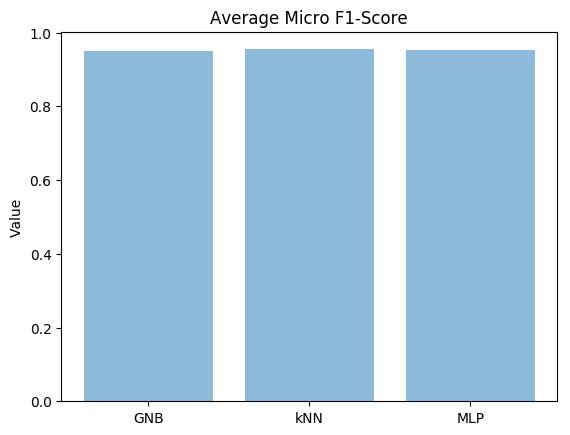

In [0]:
objects = ('GNB', 'kNN', 'MLP')
y_pos = np.arange(len(objects))

perf = [Gnb_f1_mic, Knn_f1_mic, Mlp_f1_mic]
bar_plot_function('Average Micro F1-Score', perf)

Για f1-macro:

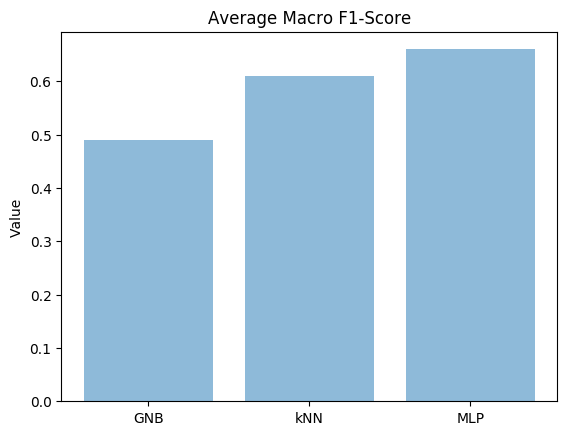

In [0]:
perf = [Gnb_f1_mac, Knn_f1_mac, Mlp_f1_mac]
bar_plot_function('Average Macro F1-Score', perf)

##4.

Μεταβολή επίδοσης των ταξινομητών

*Gaussian Naive Bayes*

In [0]:
print("Gaussian Naive Bayes\n")
print("         ", "f1-micro", "          ", "f1-macro")
print("before : ", gnb_f1_mic, gnb_f1_mac)
print("after  : ", Gnb_f1_mic, "", Gnb_f1_mac)

Gaussian Naive Bayes

          f1-micro            f1-macro
before :  0.07049608355091384 0.07000249064086174
after  :  0.9503148517892797  0.4903075602769434


*kNN*

In [0]:
print("kNN\n")
print("         ", "f1-micro", "         ", "f1-macro")
print("before : ", knn_f1_mic, knn_f1_mac)
print("after  : ", Knn_f1_mic, Knn_f1_mac)

kNN

          f1-micro           f1-macro
before :  0.9506220242666257 0.5498820429827469
after  :  0.9547688527107971 0.6099644712025268


*Multi-Layer Perceptron*

In [0]:
print("Multi-Layer Perceptron\n")
print("         ", "f1-micro", "         ", "f1-macro")
print("before : ", mlp_f1_mic, mlp_f1_mac)
print("after  : ", Mlp_f1_mic, Mlp_f1_mac)

Multi-Layer Perceptron

          f1-micro           f1-macro
before :  0.8703732145599754 0.5643597981714681
after  :  0.9518507141760099 0.6600961557986074


##5.

Παρατηρούμε ότι η μετρική f1-micro φτάνει σε πολύ υψηλό ποσοστό και στους 3 ταξινομητές. Αυτό συμβαίνει διότι είναι πολύ εύκολο να προβλεπτεί η κλάση 0 λόγω της μεγάλης ανισορροπίας που υπάρχει (95-5).<br>
Για αυτό το λόγο όμως είναι αντίστοιχα δύσκολο να προβλεπτεί η κλάση 1, και για αυτό έχοντας χαμηλά ποσοστά σε αυτήν, βλέπουμε ότι το f1-macro πιάνει αρκετά χαμηλά ποσοστά και στους 3 ταξινομητές (ειδικά στον Gaussian). Αυτό φαίνεται εύκολα και από τα μητρώα Confusion, όπου έχουμε μεγάλο αριθμό στη θέση (2,1) σε σχέση με την (2,2). Δηλαδή, πολλά δείγματα της κλάσης 2 δεν προβλεύθηκαν σωστά.<br>
Τις μεγαλύτερες μεταβολές σε απόδοση τις είχε εμφανώς ο GNB, καθότι πριν την βελτιστοποίησή του δεν έπιανε ούτε 10% σε f1 μετρικές.<br>
Όσον αφορά τους χρόνους εκτέλεσης, παρατηρούμε μικρούς χρόνους για τον GNB τόσο στο fit όσο και στο predict. Στον kNN έχουμε μικρούς χρόνους στο fit, αλλά μεγάλους στο predict. Και στον MLP έχουμε ακριβώς το αντίστροφο. Επίσης παρατηρούμε ότι ανάλογα με το πόσο μεγάλο είναι το pipeline (αριθμός transformers) αυξάνονται και οι χρόνοι εκτέλεσης.